In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [31]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


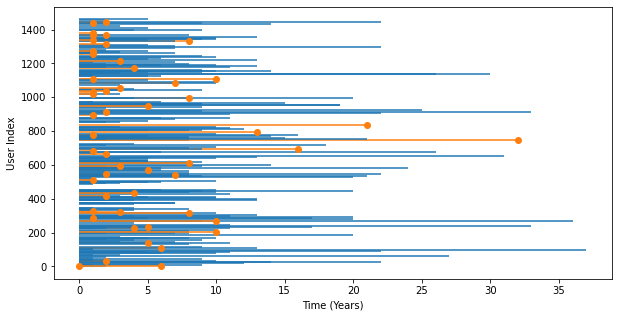

In [32]:
plt.figure(figsize=(10,5))
for y, row in df.sample(300).iterrows():
    start = 0
    duration = row.YearsAtCompany
    status = row.Attrition

    if status == 'No':
        plt.hlines(y, start, duration, color='C0')
    else:
        plt.hlines(y, start, duration, color='C1')
        plt.plot(duration, y, marker='o', color='C1')
    
    plt.xlabel('Time (Years)')
    plt.ylabel('User Index')

In [33]:
ts = df.YearsAtCompany.unique()
ts.sort()
ts

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34,
       36, 37, 40])

In [34]:
at_risk = pd.Series(0, index=ts)

for t in ts:
    k = (t <= df.YearsAtCompany) # True/False เพื่อใช้ filter ช่วงเวลาที่ต้องการ
    at_risk[t] = k.sum()

In [35]:
out = pd.Series(0, index=ts)

for t in ts:
    k = (df.Attrition == 'Yes') & (df.YearsAtCompany == t)
    out[t] = k.sum()

In [36]:
data_d = {'out':out, 'at_risk':at_risk}
df_t = pd.DataFrame(data_d, index=ts)
df_t

,out,at_risk
0,16,1470
1,59,1426
2,27,1255
3,20,1128
4,19,1000
5,21,890
6,9,694
7,11,618
8,9,528
9,8,448


#### Hazard Function

Hazard function or hazard rate, h(t), is the probability of an individual who has survived until time t and experiencing the event of interest at exactly at time t.

Hazard function and survival function can be derived from each other by using the following formula.

![Hazard Function](img/hazard_function.png)

In [37]:
df_t['hazard'] = df_t['out'] / df_t['at_risk']
df_t.head(5)

,out,at_risk,hazard
0,16,1470,0.010884
1,59,1426,0.041374
2,27,1255,0.021514
3,20,1128,0.017730
4,19,1000,0.019000


#### Survival Probability as time t

Being a non-parametric estimator, Kaplan-Meier doesn’t require making initial assumptions about the distribution of data. It also takes care of right-censored observations by computing the survival probabilities from observed survival times. 

It uses the product rule from probability and in fact, it is also called a product-limit estimator 

![Survival Probability as time t](img/surv_function.png)

In [38]:
df_t['surv'] = (1-df_t['hazard']).cumprod()
df_t

,out,at_risk,hazard,surv
0,16,1470,0.010884,0.989116
1,59,1426,0.041374,0.948192
2,27,1255,0.021514,0.927792
3,20,1128,0.017730,0.911342
4,19,1000,0.019000,0.894026
5,21,890,0.023596,0.872931
6,9,694,0.012968,0.861611
7,11,618,0.017799,0.846275
8,9,528,0.017045,0.831850
9,8,448,0.017857,0.816995


In [39]:
df_t['cdf'] = 1-df_t['surv']
df_t['pmf'] = np.diff(df_t['cdf'], prepend=0)
df_t

,out,at_risk,hazard,surv,cdf,pmf
0,16,1470,0.010884,0.989116,0.010884,0.010884
1,59,1426,0.041374,0.948192,0.051808,0.040924
2,27,1255,0.021514,0.927792,0.072208,0.020399
3,20,1128,0.017730,0.911342,0.088658,0.016450
4,19,1000,0.019000,0.894026,0.105974,0.017315
5,21,890,0.023596,0.872931,0.127069,0.021095
6,9,694,0.012968,0.861611,0.138389,0.011320
7,11,618,0.017799,0.846275,0.153725,0.015336
8,9,528,0.017045,0.831850,0.168150,0.014425
9,8,448,0.017857,0.816995,0.183005,0.014854


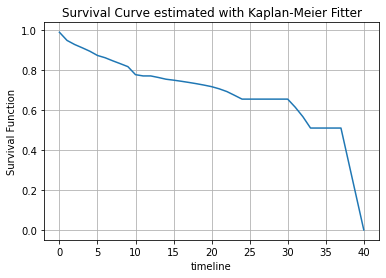

In [40]:
plt.plot(df_t.surv)
plt.title('Survival Curve estimated with Kaplan-Meier Fitter')
plt.ylabel('Survival Function')
plt.xlabel('timeline')
plt.grid()
plt.show()

reference: https://allendowney.github.io/SurvivalAnalysisPython/02_kaplan_meier.html

## Lifelines package

In [41]:
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter
from lifelines.statistics import logrank_test

### Kaplan-Meier Model

In [42]:
km = KaplanMeierFitter()
df['status'] = df.Attrition.apply(lambda x : 1 if x == 'Yes' else 0)

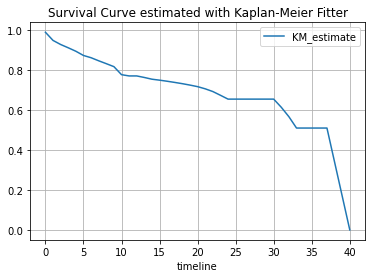

In [43]:
km.fit(durations=df.YearsAtCompany, event_observed=df.status)
# Plot the survival function
km.survival_function_.plot()
plt.title('Survival Curve estimated with Kaplan-Meier Fitter')
plt.grid()
plt.show()

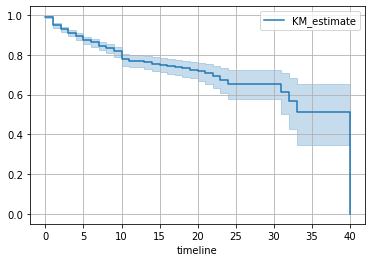

In [44]:
# Plot the survival function with confidence intervals
km.plot_survival_function()
plt.grid()
plt.show()

#### Survival Function of Different Groups with KMF

In [45]:
def fit_diff_group(low, high, name):
    ax = plt.subplot()
    km.fit(durations=df[low].YearsAtCompany, event_observed=df[low].status, label='Low')
    km.survival_function_.plot(ax=ax)

    km.fit(durations=df[high].YearsAtCompany, event_observed=df[high].status, label='High')
    km.survival_function_.plot(ax=ax)

    plt.title('Survival Function based on {0}'.format(name))
    plt.grid()
    plt.show()

def logrank_diff_group(low, high):
    output = logrank_test(
    durations_A=df[low].YearsAtCompany,
    durations_B=df[high].YearsAtCompany,
    event_observed_A= df[low].status,
    event_observed_B=df[high].status
    )

    print('p-value :',output.p_value)

In [46]:
bad = (df.WorkLifeBalance == 1)|(df.WorkLifeBalance == 2)
best = (df.WorkLifeBalance == 3)|(df.WorkLifeBalance == 4)

In [47]:
df[bad].head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,status
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,80,0,8,2,2,7,7,3,6,0
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,80,3,12,3,2,1,0,0,0,0
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,80,2,17,3,2,7,7,7,7,0
12,31,No,Travel_Rarely,670,Research & Development,26,1,Life Sciences,1,16,...,80,1,5,1,2,5,2,4,3,0


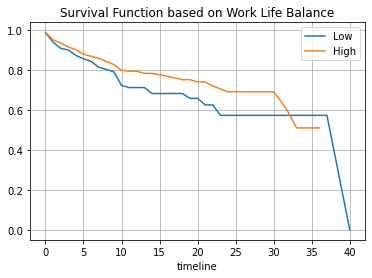

In [48]:
fit_diff_group(low=bad, high=best, name='Work Life Balance')

In [49]:
logrank_diff_group(low=bad, high=best)

p-value : 0.03587580689265322


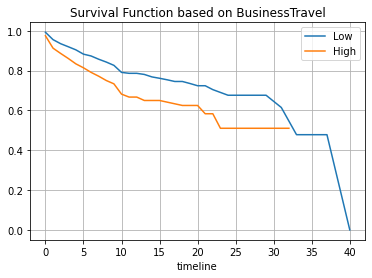

In [50]:
rarely_travel = df['BusinessTravel'] == 'Travel_Rarely'
freq_travel = df['BusinessTravel'] == 'Travel_Frequently'

fit_diff_group(low=rarely_travel, high=freq_travel, name='BusinessTravel')

In [51]:
logrank_diff_group(low=rarely_travel, high=freq_travel)

p-value : 0.0004116097046372131


### Cox Proportional-Hazards Model

In [52]:
model_cox = CoxPHFitter()

df['BusinessTravel_e'] = df.BusinessTravel.apply(lambda x: 1 if x=='Travel_Frequently' else 0)

columns_selected = ['status', 'BusinessTravel_e', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear', 'YearsAtCompany']
df_c = df[columns_selected]

df_c

,status,BusinessTravel_e,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany
0,1,0,2,3,2,4,11,1,0,0,6
1,0,1,3,2,2,2,23,4,1,3,10
2,1,0,4,2,1,3,15,2,0,3,0
3,0,1,4,3,1,3,11,3,0,3,8
4,0,0,1,3,1,2,12,4,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,3,4,2,4,17,3,1,3,5
1466,0,0,4,2,3,1,15,1,1,5,7
1467,0,0,2,4,2,2,20,2,1,0,6
1468,0,1,4,2,2,2,14,4,0,3,9


In [53]:
model_cox.fit(df_c, duration_col='YearsAtCompany', event_col='status')
# Print model summary
model_cox.print_summary()

<lifelines.CoxPHFitter: fitted with 1470 total observations, 1233 right-censored observations>
             duration col = 'YearsAtCompany'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 1470
number of events observed = 237
   partial log-likelihood = -1443.33
         time fit was run = 2022-08-17 08:17:21 UTC

---
                           coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                        
BusinessTravel_e           0.51       1.67       0.14             0.23             0.79                 1.26                 2.21
EnvironmentSatisfaction   -0.23       0.79       0.06            -0.35            -0.12                 0.71                 0.89
JobInvolvement            -0.43       0.65       0.09            -0.60            -0.26                 0.55                 0.77
JobLevel                  -1.01       0.36       0.09            -1.19            -0.83                 0.30                 0.44
JobSatisfaction           -0.23       0.80       0.06            -0.34            -0.11                 0.71                 0.89
PercentSalaryHike         -0.01       0.99       0.02            -0.05             0.02                 0.96                 1.02
RelationshipSatisfaction  -0.08       0.92       0.06            -0.20             0.04                 0.82                 1.04
StockOptionLevel          -0.42       0.66       0.09            -0.60            -0.24                 0.55                 0.79
TrainingTimesLastYear     -0.18       0.84       0.06            -0.28            -0.07                 0.75                 0.94

                           cmp to      z      p   -log2(p)
covariate                                                 
BusinessTravel_e             0.00   3.55 <0.005      11.32
EnvironmentSatisfaction      0.00  -3.95 <0.005      13.67
JobInvolvement               0.00  -5.02 <0.005      20.91
JobLevel                     0.00 -10.72 <0.005      86.60
JobSatisfaction              0.00  -3.95 <0.005      13.64
PercentSalaryHike            0.00  -0.59   0.56       0.85
RelationshipSatisfaction     0.00  -1.36   0.17       2.53
StockOptionLevel             0.00  -4.54 <0.005      17.41
TrainingTimesLastYear        0.00  -3.17 <0.005       9.34
---
Concordance = 0.80
Partial AIC = 2904.66
log-likelihood ratio test = 261.58 on 9 df
-log2(p) of ll-ratio test = 167.58

#### Plotting the coefficients

<AxesSubplot:xlabel='log(HR) (95% CI)'>

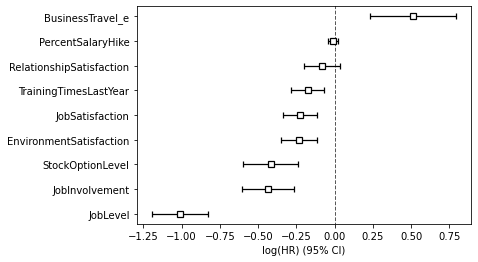

In [54]:
# Plot factor effects
model_cox.plot()

### Testing proportional Hazards assumption

In principle, the Schoenfeld residuals are independent of time.

The proportional hazard assumption is supported by a non-significant relationship between residuals and time, and refuted by a significant relationship.

reference: http://www.sthda.com/english/wiki/cox-model-assumptions#:~:text=The%20proportional%20hazards%20(PH)%20assumption,violation%20of%20the%20PH%20assumption.

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 1470 total observations, 1233 right-censored observations>
         test_name = proportional_hazard_test

---
                               test_statistic    p  -log2(p)
BusinessTravel_e         km              0.88 0.35      1.53
                         rank            1.03 0.31      1.69
EnvironmentSatisfaction  km              0.25 0.62      0.70
                         rank            0.35 0.55      0.85
JobInvolvement           km              0.05 0.82      0.28
                         rank            0.01 0.91      0.14
JobLevel                 km              3.69 0.05      4.19
                         rank            3.31 0.07      3.86
JobSatisfaction          km              0.60 0.44      1.19
                         rank            0.03 0.87      0.20
PercentSalaryHike        km              0.40 0.53      0.92
                         rank            1.65 0.20      2.33
RelationshipSatisfaction km              0.04 0.84      0.26
                         rank            0.05 0.82      0.28
StockOptionLevel         km              0.38 0.54      0.90
                         rank            1.51 0.22      2.19
TrainingTimesLastYear    km              0.53 0.47      1.10
                         rank            1.99 0.16      2.66



1. Variable 'JobLevel' failed the non-proportional test: p-value is 0.0549.

   Advice: with so few unique values (only 5), you can include `strata=['JobLevel', ...]` in the
call in `.fit`. See documentation in link [E] below.

   Bootstrapping lowess lines. May take a moment...


---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Bin-variable-and-stratify-on-it
[C]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Introduce-time-varying-covariates
[D]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Modify-the-functional-form
[E]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Stratification



[[<AxesSubplot:xlabel='rank-transformed time\n(p=0.0688)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.0549)'>]]

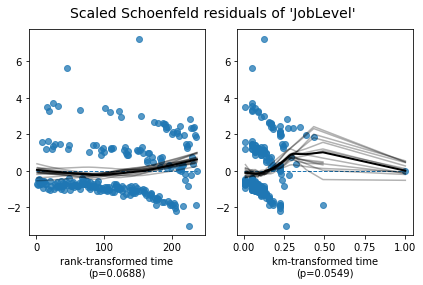

In [55]:
model_cox.check_assumptions(df_c, p_value_threshold=0.05, show_plots=True)

#### Stratification

In the advice above, we can see that jobLevel has small cardinality, so we can easily fix that by specifying it in the strata.

What does the strata do? Let’s go back to the proportional hazard assumption.

In [57]:
model_cox_1 = CoxPHFitter()

model_cox_1.fit(
    df_c, duration_col='YearsAtCompany', 
    event_col='status', 
    strata=['JobLevel']
    )
# Print model summary
model_cox_1.print_summary()

<lifelines.CoxPHFitter: fitted with 1470 total observations, 1233 right-censored observations>
             duration col = 'YearsAtCompany'
                event col = 'status'
                   strata = ['JobLevel']
      baseline estimation = breslow
   number of observations = 1470
number of events observed = 237
   partial log-likelihood = -1225.89
         time fit was run = 2022-08-17 08:17:53 UTC

---
                           coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                        
BusinessTravel_e           0.50       1.66       0.14             0.22             0.79                 1.25                 2.20
EnvironmentSatisfaction   -0.22       0.81       0.06            -0.33            -0.10                 0.72                 0.90
JobInvolvement            -0.42       0.65       0.09            -0.60            -0.25                 0.55                 0.78
JobSatisfaction           -0.22       0.81       0.06            -0.33            -0.10                 0.72                 0.90
PercentSalaryHike         -0.01       0.99       0.02            -0.04             0.03                 0.96                 1.03
RelationshipSatisfaction  -0.09       0.91       0.06            -0.21             0.03                 0.81                 1.03
StockOptionLevel          -0.41       0.66       0.09            -0.59            -0.23                 0.55                 0.79
TrainingTimesLastYear     -0.17       0.84       0.06            -0.28            -0.06                 0.76                 0.94

                           cmp to     z      p   -log2(p)
covariate                                                
BusinessTravel_e             0.00  3.48 <0.005      10.97
EnvironmentSatisfaction      0.00 -3.70 <0.005      12.17
JobInvolvement               0.00 -4.85 <0.005      19.66
JobSatisfaction              0.00 -3.75 <0.005      12.47
PercentSalaryHike            0.00 -0.54   0.59       0.76
RelationshipSatisfaction     0.00 -1.52   0.13       2.95
StockOptionLevel             0.00 -4.50 <0.005      17.14
TrainingTimesLastYear        0.00 -3.11 <0.005       9.09
---
Concordance = 0.69
Partial AIC = 2467.77
log-likelihood ratio test = 99.57 on 8 df
-log2(p) of ll-ratio test = 57.41

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 1470 total observations, 1233 right-censored observations>
         test_name = proportional_hazard_test

---
                               test_statistic    p  -log2(p)
BusinessTravel_e         km              0.94 0.33      1.59
                         rank            1.74 0.19      2.41
EnvironmentSatisfaction  km              0.01 0.92      0.12
                         rank            4.03 0.04      4.49
JobInvolvement           km              0.05 0.83      0.27
                         rank            0.53 0.47      1.10
JobSatisfaction          km              0.38 0.54      0.89
                         rank            0.06 0.81      0.30
PercentSalaryHike        km              0.51 0.47      1.08
                         rank            3.88 0.05      4.36
RelationshipSatisfaction km              0.05 0.82      0.29
                         rank            0.36 0.55      0.87
StockOptionLevel         km              0.27 0.60      0.73
                         rank            1.91 0.17      2.59
TrainingTimesLastYear    km              0.93 0.34      1.57
                         rank            0.90 0.34      1.55



1. Variable 'EnvironmentSatisfaction' failed the non-proportional test: p-value is 0.0446.

   Advice: with so few unique values (only 4), you can include `strata=['EnvironmentSatisfaction',
...]` in the call in `.fit`. See documentation in link [E] below.

   Bootstrapping lowess lines. May take a moment...


2. Variable 'PercentSalaryHike' failed the non-proportional test: p-value is 0.0488.

   Advice 1: the functional form of the variable 'PercentSalaryHike' might be incorrect. That is,
there may be non-linear terms missing. The proportional hazard test used is very sensitive to
incorrect functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'PercentSalaryHike' using pd.cut, and then specify it in
`strata=['PercentSalaryHike', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


   Boo

[[<AxesSubplot:xlabel='rank-transformed time\n(p=0.0446)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.9183)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p=0.0488)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.4743)'>]]

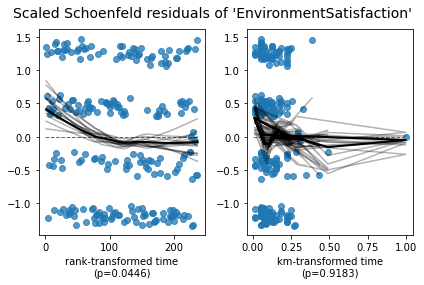

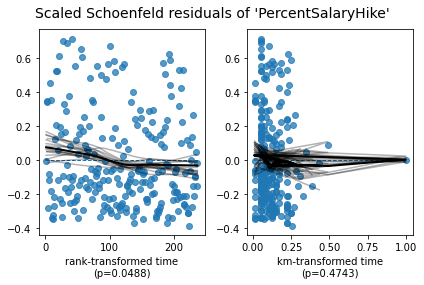

In [58]:
model_cox_1.check_assumptions(df_c, p_value_threshold=0.05, show_plots=True)

#### Do I need to care about the proportional hazard assumption?

1.If your goal is survival prediction, then you don’t need to care about proportional hazards. Your goal is to maximize some score, irrelevant of how predictions are generated.

2.Given a large enough sample size, even very small violations of proportional hazards will show up.

3.There are legitimate reasons to assume that all datasets will violate the proportional hazards assumption. This is detailed well in Stensrud & Hernán’s “Why Test for Proportional Hazards?” [1].

4.“Even if the hazards were not proportional, altering the model to fit a set of assumptions fundamentally changes the scientific question. As Tukey said,”Better an approximate answer to the exact question, rather than an exact answer to the approximate question.” If you were to fit the Cox model in the presence of non-proportional hazards, what is the net effect? Slightly less power. In fact, you can recover most of that power with robust standard errors (specify robust=True). In this case the interpretation of the (exponentiated) model coefficient is a time-weighted average of the hazard ratio–I do this every single time.” from AdamO, slightly modified to fit lifelines [2]

reference: https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html

#### Plotting the effect of varying a covariate

<AxesSubplot:>

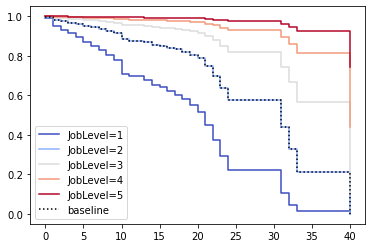

In [59]:
model_cox.plot_partial_effects_on_outcome(covariates='JobLevel', values=[1,2,3,4,5], cmap='coolwarm')

<AxesSubplot:>

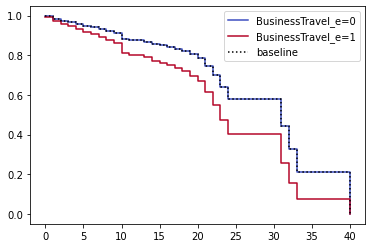

In [60]:
model_cox.plot_partial_effects_on_outcome(covariates='BusinessTravel_e', values=[0,1], cmap='coolwarm')

<AxesSubplot:>

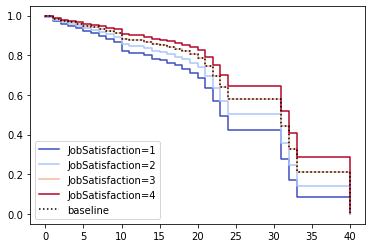

In [61]:
model_cox.plot_partial_effects_on_outcome(covariates='JobSatisfaction', values=[1,2,3,4], cmap='coolwarm')

#### Prediction

In [62]:
df_new = df_c[df_c['status']==0]
df_new

,status,BusinessTravel_e,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany
1,0,1,3,2,2,2,23,4,1,3,10
3,0,1,4,3,1,3,11,3,0,3,8
4,0,0,1,3,1,2,12,4,1,3,2
5,0,1,4,3,1,4,13,3,0,2,7
6,0,0,3,4,1,1,20,1,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,3,4,2,4,17,3,1,3,5
1466,0,0,4,2,3,1,15,1,1,5,7
1467,0,0,2,4,2,2,20,2,1,0,6
1468,0,1,4,2,2,2,14,4,0,3,9


In [63]:
df_new_obs = df_new['YearsAtCompany']
df_new_obs

1       10
3        8
4        2
5        7
6        1
        ..
1465     5
1466     7
1467     6
1468     9
1469     4
Name: YearsAtCompany, Length: 1233, dtype: int64

In [64]:
# predict survival function
# Column is Employee n
model_cox.predict_survival_function(df_new, conditional_after=df_new_obs).head(6)

,1,3,4,5,6,7,8,9,10,11,...,1459,1460,1462,1463,1464,1465,1466,1467,1468,1469
0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1.0,0.980541,0.935961,0.964466,0.946836,0.989277,0.979462,0.954509,0.992560,0.983224,0.941737,...,0.977044,0.943486,0.985105,0.880878,0.944223,0.994412,0.994095,0.982624,0.884300,0.984220
2.0,0.980541,0.769929,0.925209,0.890240,0.979981,0.961822,0.945182,0.984233,0.958951,0.929889,...,0.962918,0.865777,0.965001,0.857627,0.910843,0.986212,0.987474,0.964824,0.861664,0.974452
3.0,0.953727,0.738864,0.875593,0.742208,0.969411,0.941952,0.945182,0.960067,0.934276,0.929889,...,0.942419,0.791546,0.939835,0.857627,0.863671,0.977732,0.968194,0.945129,0.861664,0.960197
4.0,0.921047,0.738864,0.845845,0.714280,0.955567,0.916230,0.932177,0.955047,0.907197,0.913425,...,0.921506,0.715409,0.912189,0.825860,0.817077,0.968253,0.964176,0.889328,0.830705,0.945552
5.0,0.903255,0.697151,0.803732,0.714280,0.946987,0.900459,0.916077,0.955047,0.831787,0.893135,...,0.898468,0.530832,0.912189,0.787578,0.767519,0.940816,0.964176,0.877986,0.793348,0.929298
